In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#To check if this particular dataset has any missing values 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#No Missing Values

#  EDA 

C:\Users\PMLS\AppData\Local\Temp\ipykernel_1748\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

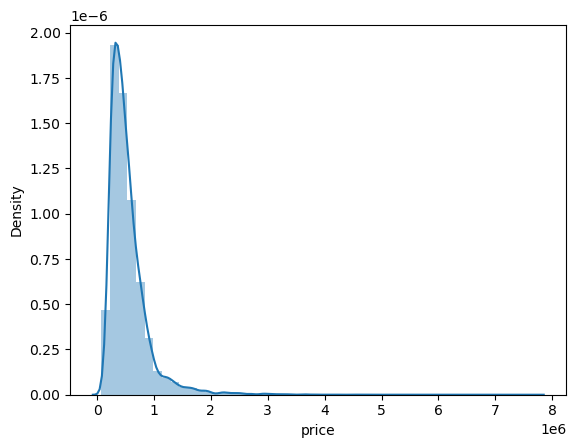

In [8]:
sns.distplot(df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

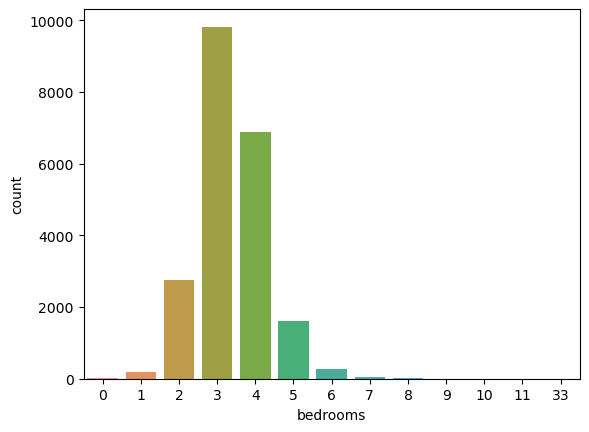

In [9]:
sns.countplot(x=df['bedrooms'])

<Axes: xlabel='long', ylabel='price'>

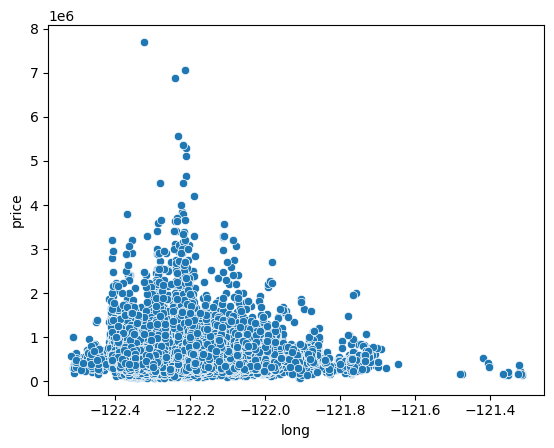

In [10]:
sns.scatterplot(x=df['long'],y=df['price'])

<Axes: xlabel='lat', ylabel='price'>

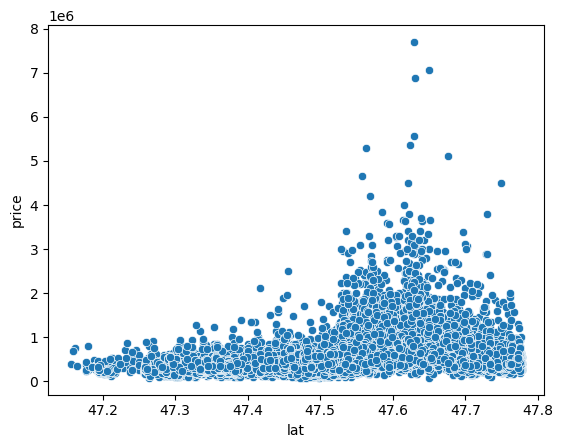

In [11]:
sns.scatterplot(x=df['lat'],y=df['price'])

<Axes: xlabel='long', ylabel='lat'>

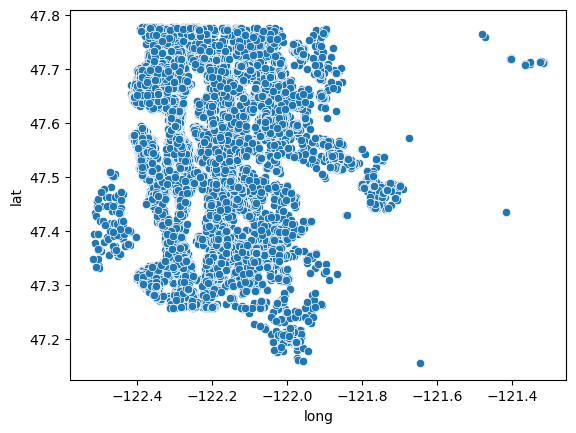

In [12]:
sns.scatterplot(x=df['long'],y=df['lat'],data=df)

In [13]:
df['price'].sort_values(ascending=False).head(20)

7252     7700000.0
3914     7062500.0
9254     6885000.0
4411     5570000.0
1448     5350000.0
1315     5300000.0
1164     5110800.0
8092     4668000.0
2626     4500000.0
8638     4489000.0
12370    4208000.0
4149     4000000.0
2085     3850000.0
19017    3800000.0
7035     3800000.0
16302    3710000.0
6508     3650000.0
18482    3650000.0
15255    3640900.0
19148    3635000.0
Name: price, dtype: float64

<Axes: xlabel='waterfront', ylabel='price'>

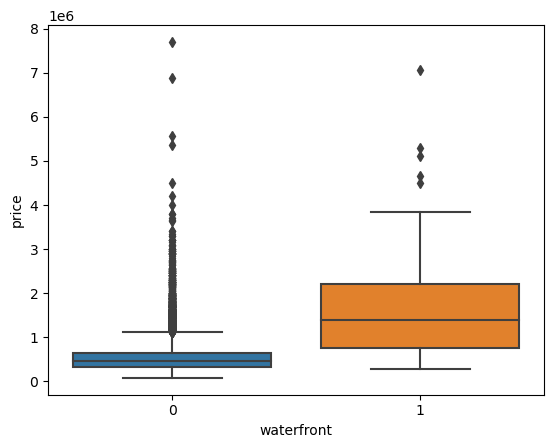

In [14]:
sns.boxplot(x=df['waterfront'],y=df['price'],data=df)

In [15]:
# Id column is of no use so we can drop it
df = df.drop('id',axis=1)

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [18]:
#Right now the date column dtype is object.  Lets convert it into datetime, so we can extract moht,year,date easily from it.
df['date']= pd.to_datetime(df['date'])

In [19]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [20]:
# lets make a new column called year
df['year'] = df['date'].apply(lambda date : date.year)

In [21]:
# lets make a new column called month
df['month'] = df['date'].apply(lambda date : date.month)

In [22]:
#The above 2 steaps are basically called feature engineering because these two features were hidden inside the string date. 
#We made 2 columns from them now to extract more info from original features.

In [23]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [24]:
# Now lets do some EDA, to see if these new features are usefull or not

<Axes: xlabel='month', ylabel='price'>

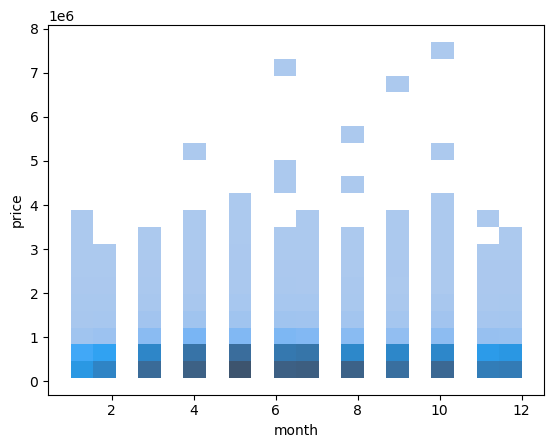

In [25]:
sns.histplot(bins=20,x=df['month'],y=df['price'],data=df)

<Axes: xlabel='month', ylabel='price'>

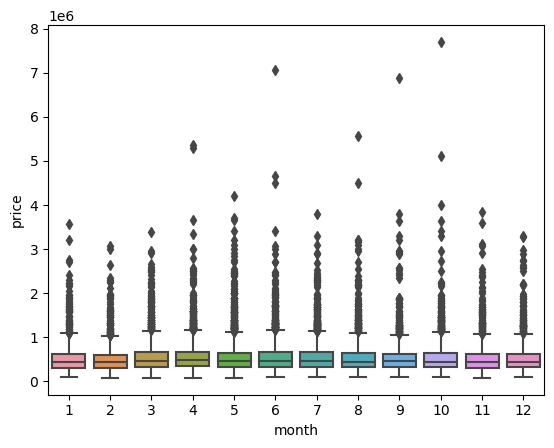

In [26]:
sns.boxplot(x=df['month'],y=df['price'],data=df)

<Axes: xlabel='year', ylabel='price'>

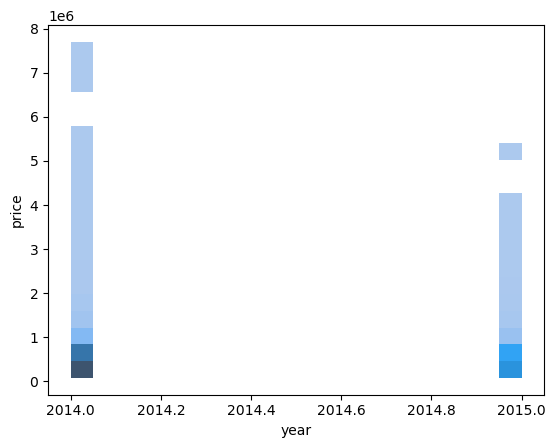

In [27]:
sns.histplot(bins=20,x=df['year'],y=df['price'],data=df)

<Axes: xlabel='year', ylabel='price'>

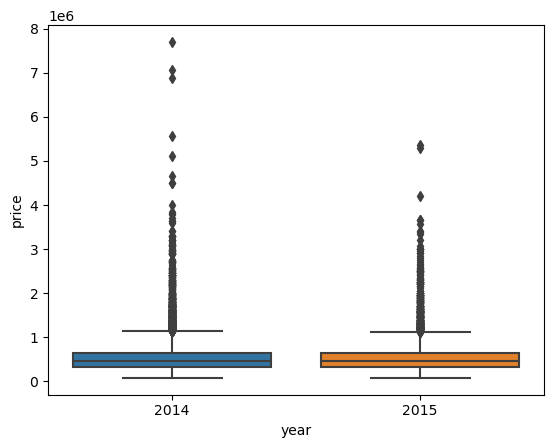

In [28]:
sns.boxplot(x=df['year'],y=df['price'],data=df)

In [29]:
df.groupby('month').mean()['price']

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

<Axes: xlabel='month'>

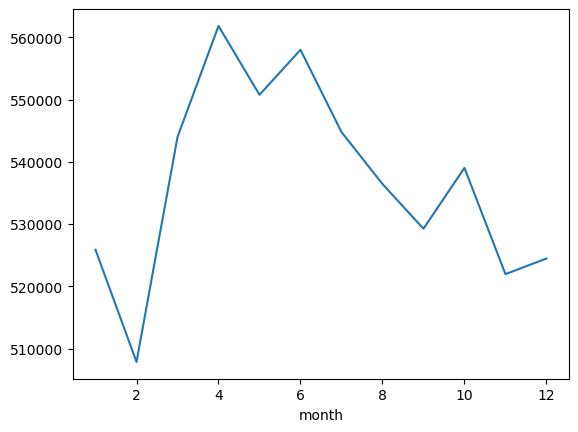

In [30]:
df.groupby('month').mean()['price'].plot()

In the 4,5,6 month proces have gone up.

<Axes: xlabel='year'>

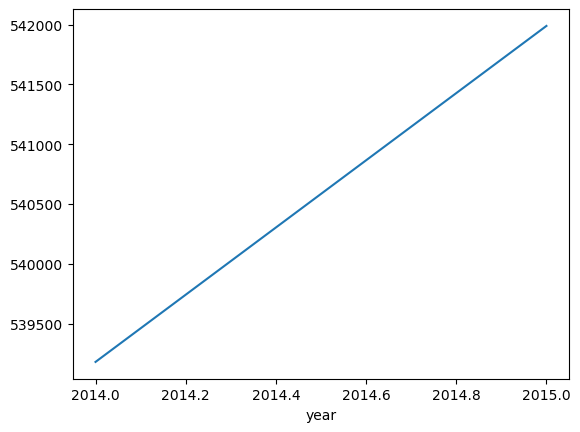

In [31]:
df.groupby('year').mean()['price'].plot()

Make sense because the prices increased every year.

In [32]:
df.groupby('year').mean()['price']

year
2014    539181.428415
2015    541988.992264
Name: price, dtype: float64

in the year 2-15,prices got increased.

In [33]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [34]:
df = df.drop('date',axis=1)

In [35]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [36]:
df = df.drop('zipcode',axis=1)

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


# Data Pre Processing and Model Evaluation

In [38]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
X_train = scaler.fit_transform(X_train)

In [44]:
X_test= scaler.transform(X_test)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [109]:
model6 = Sequential()
# we try to make the neuron based on the size of our features.

In [61]:
#Lets check out the size of features
X.shape

(21613, 19)

Looks like we have total 19 features

In [110]:
model6.add(Dense(19,activation='relu'))
model6.add(Dense(19,activation='relu'))
model6.add(Dense(19,activation='relu'))
model6.add(Dense(19,activation='relu'))
model6.add(Dense(1)) # Single neuron output layer which will predict the actual price.
model6.compile(optimizer='adam',loss='mse')

validation data  means after each epoche of training on tarining data, we quickly run the test data and check our loss on test
data.So that way we can keep track of how well its performing not just on training but test data too. Keep in mind that this 
test data wont actuallly affect the weights and biases of our netwrok so keras isnt going to update your model based on test 
data or validation data insetead it will only use the training dtaa as its updating weights and biases and continue to check 
how its performing not just on training but also on validation data.

In [111]:
model6.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=700, batch_size=128)
# We are training on x train y train but as we go along we wanna be checking against our test set and that will give us some 
# nice to basically realize wheather or not we are overfitting.

#We finally, because it larger dataset, we are going to feed our data in batches and we are gonna call batch size of 128. Its
# very typical to do batch sizes in powers of 2. The smaller the batch size, the longer the training is going to take but the less
# likely is going to overfit your data bcz you are not passing your entire data set at once, insted in small batches.

# Finally lets chose large number epoche. We dont have an early stopping mechanisms yet. We will do that later. we will chose 400,
#that way we can see thos enice curves and compare our tarining and tetsing performance.

Epoch 1/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 409634734080.0000 - val_loss: 434014191616.0000
Epoch 2/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 429746192384.0000 - val_loss: 431449440256.0000
Epoch 3/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 419583524864.0000 - val_loss: 409072861184.0000
Epoch 4/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 392544518144.0000 - val_loss: 324293984256.0000
Epoch 5/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 302356365312.0000 - val_loss: 179977076736.0000
Epoch 6/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 147462275072.0000 - val_loss: 109064519680.0000
Epoch 7/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101056413696.0000 - val_loss: 103937081344.0000
Epoch 8/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99276767232.0000 - val_loss: 102452158464.0000
Epoch 9/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97786765312.0000 - val_loss: 100968800256.0000
Epoch 10/700
119/119 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40775913472.0000 - val_loss: 42633986048.0000
Epoch 59/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42750836736.0000 - val_loss: 42333151232.0000
Epoch 60/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45852102656.0000 - val_loss: 42053963776.0000
Epoch 61/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51314847744.0000 - val_loss: 41823227904.0000
Epoch 62/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42246066176.0000 - val_loss: 41549123584.0000
Epoch 63/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38081105920.0000 - val_loss: 41283792896.0000
Epoch 64/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41936539648.0000 - val_loss: 41035198464.0000
Epoch 65/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40202035200.0000 - val_loss: 40816218112.0000
Epoch 66/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42960080896.0000 - val_loss: 40574955520.0000
Epoch 67/700
119/119 ━━━━━━━━━━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34078756864.0000 - val_loss: 34190663680.0000
Epoch 116/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35297013760.0000 - val_loss: 34091214848.0000
Epoch 117/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34864197632.0000 - val_loss: 34069555200.0000
Epoch 118/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36580626432.0000 - val_loss: 34035005440.0000
Epoch 119/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35562708992.0000 - val_loss: 33934772224.0000
Epoch 120/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32921923584.0000 - val_loss: 33892564992.0000
Epoch 121/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32734607360.0000 - val_loss: 33823541248.0000
Epoch 122/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31361060864.0000 - val_loss: 33776048128.0000
Epoch 123/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33912350720.0000 - val_loss: 33730424832.0000
Epoch 124/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31381501952.0000 - val_loss: 32009648128.0000
Epoch 173/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33689077760.0000 - val_loss: 31996913664.0000
Epoch 174/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31493330944.0000 - val_loss: 32059557888.0000
Epoch 175/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33289443328.0000 - val_loss: 31969409024.0000
Epoch 176/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31551666176.0000 - val_loss: 31917002752.0000
Epoch 177/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31468105728.0000 - val_loss: 32014788608.0000
Epoch 178/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32950347776.0000 - val_loss: 31945574400.0000
Epoch 179/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30533597184.0000 - val_loss: 31828285440.0000
Epoch 180/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31467943936.0000 - val_loss: 31817244672.0000
Epoch 181/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30777745408.0000 - val_loss: 30834767872.0000
Epoch 230/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31234045952.0000 - val_loss: 30824531968.0000
Epoch 231/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30919469056.0000 - val_loss: 30805336064.0000
Epoch 232/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32523575296.0000 - val_loss: 30783195136.0000
Epoch 233/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32427022336.0000 - val_loss: 30791827456.0000
Epoch 234/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32977623040.0000 - val_loss: 30753253376.0000
Epoch 235/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32016754688.0000 - val_loss: 30764795904.0000
Epoch 236/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31657119744.0000 - val_loss: 30743674880.0000
Epoch 237/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30632871936.0000 - val_loss: 30710544384.0000
Epoch 238/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32894883840.0000 - val_loss: 30041241600.0000
Epoch 287/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31438116864.0000 - val_loss: 29999857664.0000
Epoch 288/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29808740352.0000 - val_loss: 29978572800.0000
Epoch 289/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30346168320.0000 - val_loss: 29967656960.0000
Epoch 290/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29914134528.0000 - val_loss: 29978388480.0000
Epoch 291/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31159521280.0000 - val_loss: 29943603200.0000
Epoch 292/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32719865856.0000 - val_loss: 29935032320.0000
Epoch 293/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29714774016.0000 - val_loss: 29918124032.0000
Epoch 294/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31277709312.0000 - val_loss: 29904025600.0000
Epoch 295/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30480297984.0000 - val_loss: 29375768576.0000
Epoch 344/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28678866944.0000 - val_loss: 29447049216.0000
Epoch 345/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27754862592.0000 - val_loss: 29351821312.0000
Epoch 346/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30500548608.0000 - val_loss: 29368133632.0000
Epoch 347/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31480358912.0000 - val_loss: 29329487872.0000
Epoch 348/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29476835328.0000 - val_loss: 29316460544.0000
Epoch 349/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30611728384.0000 - val_loss: 29373177856.0000
Epoch 350/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29793277952.0000 - val_loss: 29298825216.0000
Epoch 351/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29302011904.0000 - val_loss: 29282648064.0000
Epoch 352/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28071731200.0000 - val_loss: 28711067648.0000
Epoch 401/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30038435840.0000 - val_loss: 28795058176.0000
Epoch 402/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28572489728.0000 - val_loss: 28738312192.0000
Epoch 403/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29451816960.0000 - val_loss: 28690096128.0000
Epoch 404/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28806662144.0000 - val_loss: 28676677632.0000
Epoch 405/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28928524288.0000 - val_loss: 28657240064.0000
Epoch 406/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28434659328.0000 - val_loss: 28646592512.0000
Epoch 407/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29724002304.0000 - val_loss: 28745199616.0000
Epoch 408/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29467529216.0000 - val_loss: 28649195520.0000
Epoch 409/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28582537216.0000 - val_loss: 28140058624.0000
Epoch 458/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27825840128.0000 - val_loss: 28181147648.0000
Epoch 459/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27681949696.0000 - val_loss: 28110960640.0000
Epoch 460/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27265398784.0000 - val_loss: 28106203136.0000
Epoch 461/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29454366720.0000 - val_loss: 28110073856.0000
Epoch 462/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28581011456.0000 - val_loss: 28127838208.0000
Epoch 463/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26167840768.0000 - val_loss: 28108267520.0000
Epoch 464/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28523264000.0000 - val_loss: 28063834112.0000
Epoch 465/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27573282816.0000 - val_loss: 28077043712.0000
Epoch 466/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27553150976.0000 - val_loss: 27643760640.0000
Epoch 515/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27888406528.0000 - val_loss: 27648083968.0000
Epoch 516/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28538134528.0000 - val_loss: 27648743424.0000
Epoch 517/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25918398464.0000 - val_loss: 27763226624.0000
Epoch 518/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26846406656.0000 - val_loss: 27660926976.0000
Epoch 519/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27193434112.0000 - val_loss: 27610869760.0000
Epoch 520/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27693637632.0000 - val_loss: 27743397888.0000
Epoch 521/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27084867584.0000 - val_loss: 27683659776.0000
Epoch 522/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28258715648.0000 - val_loss: 27597287424.0000
Epoch 523/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26356699136.0000 - val_loss: 27231930368.0000
Epoch 572/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26111531008.0000 - val_loss: 27284338688.0000
Epoch 573/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26356664320.0000 - val_loss: 27451559936.0000
Epoch 574/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26267951104.0000 - val_loss: 27204859904.0000
Epoch 575/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27682484224.0000 - val_loss: 27267842048.0000
Epoch 576/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25451288576.0000 - val_loss: 27199475712.0000
Epoch 577/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26069862400.0000 - val_loss: 27232796672.0000
Epoch 578/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26716905472.0000 - val_loss: 27170488320.0000
Epoch 579/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29400479744.0000 - val_loss: 27289327616.0000
Epoch 580/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26538536960.0000 - val_loss: 26860623872.0000
Epoch 629/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25045088256.0000 - val_loss: 26953543680.0000
Epoch 630/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27021996032.0000 - val_loss: 26894178304.0000
Epoch 631/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27127488512.0000 - val_loss: 26952847360.0000
Epoch 632/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26322503680.0000 - val_loss: 26852364288.0000
Epoch 633/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26872358912.0000 - val_loss: 26887657472.0000
Epoch 634/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26902093824.0000 - val_loss: 26889414656.0000
Epoch 635/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24863164416.0000 - val_loss: 26808012800.0000
Epoch 636/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26506334208.0000 - val_loss: 26807361536.0000
Epoch 637/700
119/119 ━━━━━━━━━━━

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24958822400.0000 - val_loss: 26684516352.0000
Epoch 686/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26898923520.0000 - val_loss: 26728935424.0000
Epoch 687/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25824202752.0000 - val_loss: 26717995008.0000
Epoch 688/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25214019584.0000 - val_loss: 26679042048.0000
Epoch 689/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25794189312.0000 - val_loss: 26642128896.0000
Epoch 690/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25308385280.0000 - val_loss: 26725591040.0000
Epoch 691/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26607235072.0000 - val_loss: 26662381568.0000
Epoch 692/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23727767552.0000 - val_loss: 26718162944.0000
Epoch 693/700
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25208135680.0000 - val_loss: 26721849344.0000
Epoch 694/700
119/119 ━━━━━━━━━━━

# Model Evaluation and Predictions

Lets check out what our model's history looks like now. See how there are 2 loss columns now. "loss" is the loss on training 
data while  "val_loss" is the loss on validation(testing) data. Now we can directly compare the loss on training vs loss on 
test or validation to see if we are over fitting the data on our model and the best way to do that is plotting these.

In [112]:
 pd.DataFrame(model6.history.history)

,loss,val_loss
0,4.234526e+11,4.340142e+11
1,4.236420e+11,4.314494e+11
2,4.148506e+11,4.090729e+11
3,3.632776e+11,3.242940e+11
4,2.447786e+11,1.799771e+11
...,...,...
695,2.618018e+10,2.663169e+10
696,2.594445e+10,2.664037e+10
697,2.593630e+10,2.664624e+10
698,2.594295e+10,2.670416e+10


<Axes: >

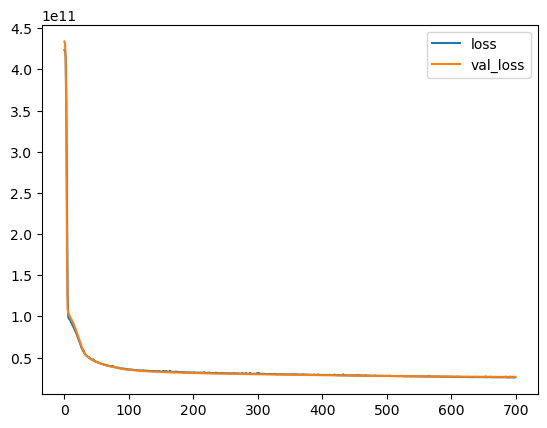

In [113]:
 pd.DataFrame(model6.history.history).plot()

Blue: training loss , orange: tetsing loss. This is exactly the kind of signal we want where there is decrease in both the training and validation loss and then there is no increase so far in the validation set and actually what that menas is technically we could have continued training. Notice after a certain point, we are not decreasing the loss that much. But because the validation loss is also going down thats an indicator that we could have continued training without overfitting to our training data. If you saw this orange line began to spike after some epoches ie if it starts going up and up and down means
you are overfitting to the training data because now you have much larger loss on validation data. So for that later, we will do early stopping. In this case, we have right now perfect case, we see both going down and then continuing down together so no overfitting here.

Lets do some evaluation on our test data.  

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [132]:
predictions = model6.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


In [133]:
predictions

array([[566350.44],
       [622527.9 ],
       [546734.1 ],
       ...,
       [408867.12],
       [219132.25],
       [992812.2 ]], dtype=float32)

In [134]:
mean_absolute_error(y_test,predictions)

100908.32105591649

In [135]:
mean_squared_error(y_test,predictions)

26722068771.92909

In [136]:
np.sqrt(mean_squared_error(y_test,predictions))

163468.8617808575

In [137]:
df.describe()['price']

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [138]:
explained_variance_score(y_test,predictions)

0.8096778823651373

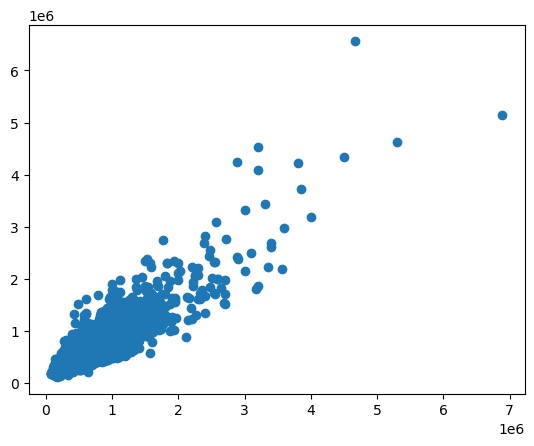

In [139]:
plt.scatter(y_test,predictions) 

Lets do predictions by giving our model some unknown value.

In [140]:
sample_value = df.drop('price',axis=1).iloc[0]

In [141]:
sample_value

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [142]:
#This is a series but tensorflow works on arrays 
sample_value=sample_value.values

In [143]:
sample_value

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [144]:
#But its a 1d array we need to convert it into the shape of our trained model features which was 19 columns
sample_value=sample_value.reshape(-1,19)
sample_value

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [145]:
#Since our model is trained on scaled data, we will scale these features too before passing them to the model

In [146]:
sample_value=scaler.transform(sample_value)
sample_value

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.        , 0.81818182]])

In [147]:
model6.predict(sample_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[261265.98]], dtype=float32)

Our model predicted a price of 261265.98 and the actual price was 221900.0. Its not too bad or too great. To improve it more
we can increase the epoches value till we get spikes.or we can remove the outliers from the price.